In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [19]:
data = pd.read_csv('data/USArrests.csv', index_col=0)
X = pd.DataFrame(StandardScaler().fit_transform(data), columns=data.columns, index=data.index)
X.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


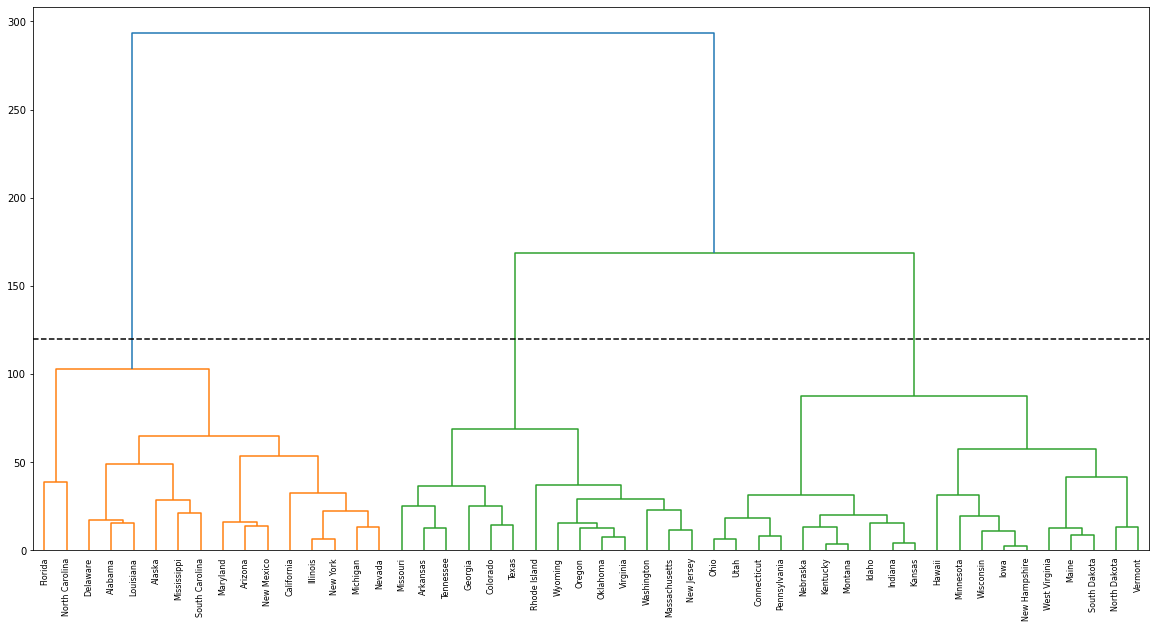

In [23]:
plt.figure(figsize=(20,10))
dendrogram(linkage(data, 'complete'), labels=X.index.tolist())
plt.axhline(y=120, c='k', ls='dashed');

In [24]:
cut_tree(linkage(data, 'complete'), n_clusters=3).flatten()

array([0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1])

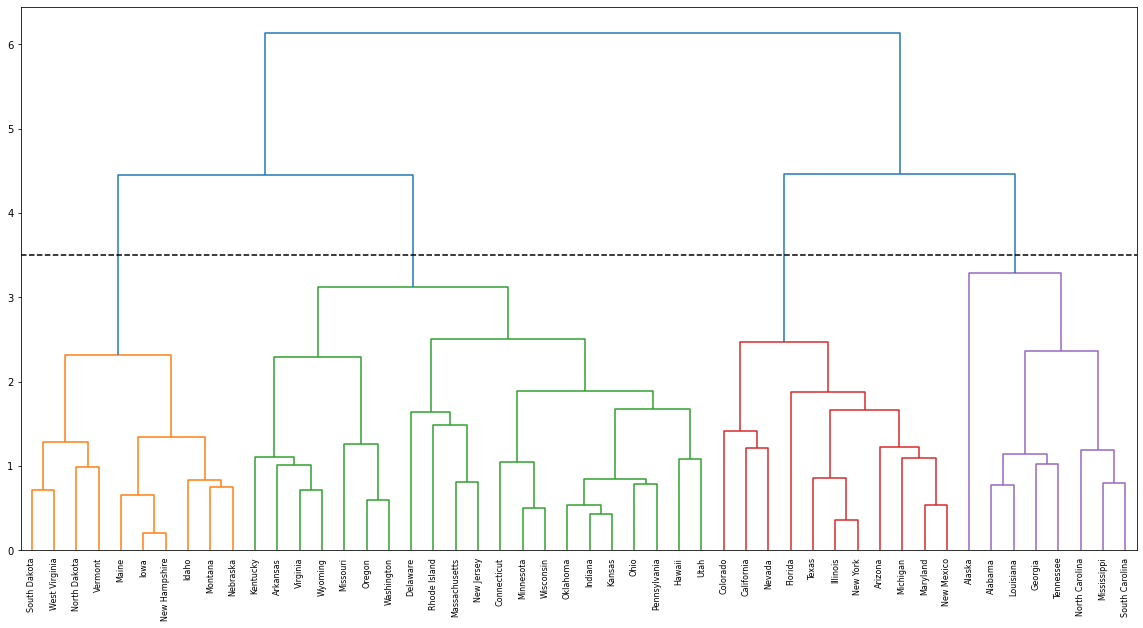

In [25]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X, 'complete'), labels=X.index.tolist())
plt.axhline(y=3.5, c='k', ls='dashed');

In [26]:
clf_hierarchi = cut_tree(linkage(data, 'complete'), n_clusters=4).flatten()
clf_hierarchi

array([0, 0, 0, 1, 0, 1, 2, 0, 3, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 3, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1])

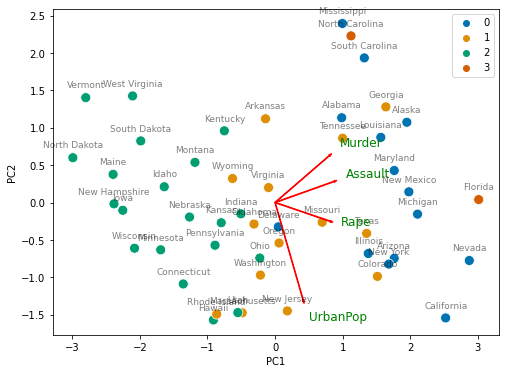

In [37]:
pca = PCA()
pc_names = ['PC{}'.format(x) for x in range(1, len(X.columns)+1)]
pc = pca.fit_transform(X)
pc = pd.DataFrame(pc, columns=pc_names, index=X.index)
loadings = pca.components_.T
loadings = pd.DataFrame(loadings, columns=pc_names, index=X.columns)

plt.figure(figsize=(8,6))
sb.scatterplot(data=pc, x='PC1', y='PC2', hue=clf_hierarchi, s=100, palette='colorblind')
for x, y, z in zip(pc['PC1'], pc['PC2'], pc.index):
    label = '{}'.format(z)
    plt.annotate(label, (x,y), textcoords='offset points', xytext=(0,10), ha='center', size=9, alpha=0.5)
for i in range(len(X.columns)):
    plt.arrow(0,0,loadings['PC1'][i]*1.5, loadings['PC2'][i]*1.5, shape='full', width=0.01, color='red')
    plt.text(loadings['PC1'][i]*1.5*1.2, loadings['PC2'][i]*1.5*1.2, loadings.index[i], size=12, color='green')